# Teste t para uma amostra

In [2]:
import pandas as pd
import numpy as  np

In [3]:
enem_sp = pd.read_csv('data/enem_2019-tratado.csv', sep=',', encoding='iso-8859-1') 

In [4]:
colegioy = enem_sp.loc[enem_sp.CO_ESCOLA == 35151506.0]

In [5]:
colegioy.shape

(30, 28)

1) Analisar a classificação das variáveis

In [6]:
colegioy.dtypes

NU_INSCRICAO                object
NO_MUNICIPIO_RESIDENCIA     object
IDADE                        int64
SEXO                        object
TP_ESTADO_CIVIL              int64
RACA                        object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
ESCOLA                      object
CO_ESCOLA                  float64
NO_MUNICIPIO_ESC            object
TP_PRESENCA_CN               int64
TP_PRESENCA_CH               int64
TP_PRESENCA_LC               int64
TP_PRESENCA_MT               int64
NOTA_CN                    float64
NOTA_CH                    float64
NOTA_LC                    float64
NOTA_MT                    float64
TP_LINGUA                   object
TP_STATUS_REDACAO          float64
COMP1                      float64
COMP2                      float64
COMP3                      float64
COMP4                      float64
COMP5                      float64
NOTA_REDACAO               float64
INTERNET                    object
dtype: object

2) Valores missing

In [7]:
colegioy.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

3) Analisar outliers

In [12]:
import seaborn as sns

<AxesSubplot: xlabel='NOTA_REDACAO'>

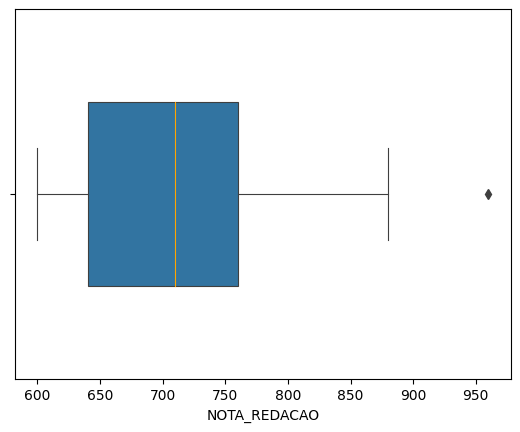

In [21]:
sns.boxplot(colegioy, x="NOTA_REDACAO", saturation=0.75, width=0.5, linewidth=0.8, medianprops={"color": "orange"})

4) Analisar normalidade

<AxesSubplot: xlabel='NOTA_REDACAO', ylabel='Probability'>

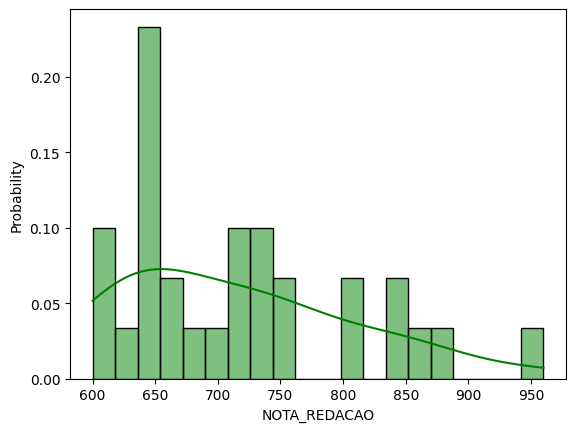

In [24]:
sns.histplot(colegioy, x="NOTA_REDACAO", bins=20, color="green", kde=True, stat="probability")

In [25]:
import scipy.stats as stats
import matplotlib.pyplot as plt

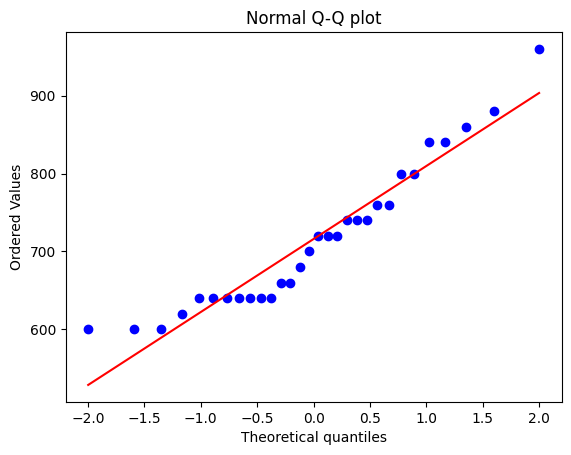

In [26]:
stats.probplot(colegioy['NOTA_REDACAO'], dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

Critérios: <br>

Nível de significância de 0.05 ou %5 (mais utilizado) <br>
Quando p > 0.05 (distribuição normal)

In [27]:
# Teste de Shapiro-Wilk
stats.shapiro(colegioy.NOTA_REDACAO)

ShapiroResult(statistic=0.9185918569564819, pvalue=0.024661008268594742)

In [28]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [29]:
# Teste Lilliefors (Komolgorov_Sminorv)
statsmodels.stats.diagnostic.lilliefors(colegioy.NOTA_REDACAO, dist="norm")

(0.15794211976028916, 0.052842042822119004)

## Teste t

Média das notas do Colégio Y, comparada a média do Estado de São Paulo <br>
. Desvio padrão desconhecido e amostra < 30

Ho média igual à SP <br>
Ha média diferente de SP

In [30]:
enem_sp.NOTA_REDACAO.describe()

count    499940.000000
mean        593.018322
std         170.536724
min           0.000000
25%         500.000000
50%         600.000000
75%         680.000000
max        1000.000000
Name: NOTA_REDACAO, dtype: float64

In [38]:
stat, p = stats.ttest_1samp(colegioy.NOTA_REDACAO, popmean=593.018322)
print(f"Estatística do teste: {stat:.9f}")
print(f"P-valor {p:.8f}")

Estatística do teste: 7.176085282
P-valor 0.00000007


In [35]:
colegioy.NOTA_REDACAO.describe()

count     30.000000
mean     716.000000
std       93.867111
min      600.000000
25%      640.000000
50%      710.000000
75%      760.000000
max      960.000000
Name: NOTA_REDACAO, dtype: float64

## Interpretação:

Teste estatístico: t = 7.1760 <br>
p_valor = 0.00000007

Concluimos que a média do Colégio Y é diferente da média do estado de São Paulo